<a href="https://drive.google.com/file/d/1C4v0q4O5wolrCYFKs-qOgQM3LvQmURN1/view?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Neural Encoding with Kay and Gallant Dataset


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from scipy import stats
import sklearn.linear_model as skl
from seaborn import heatmap
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def scale_range(input, min, max):
    input += -(np.min(input))
    input /= (1e-9 + np.max(input) / (max - min + 1e-9))
    input += min
    return input

In [ ]:
## Data Preparation
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')

In [ ]:
voxel_train = dat['responses']
voxel_test = dat['responses_test']

In [ ]:
feat_train = np.load('/content/drive/My Drive/Team KayGallant/Data/vgg16_train_convfeatures.npy', allow_pickle=True) 
feat_test = np.load('/content/drive/My Drive/Team KayGallant/Data/vgg16_test_convfeatures.npy', allow_pickle=True) 

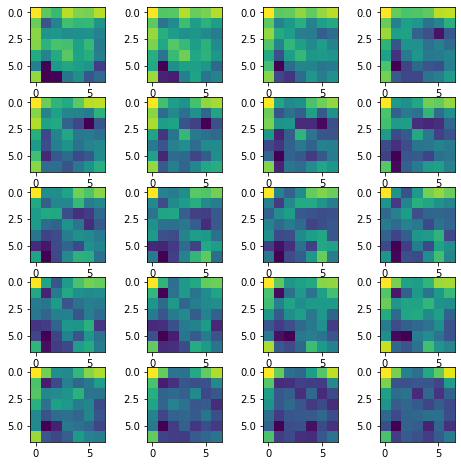

In [ ]:
features = feat_train.item().get('layer{}'.format(10))

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = features[2][i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
layers = range(10,13)
mse_train_vec = np.zeros(len(layers))
mse_test_vec = np.zeros(len(layers))
score_train_vec = np.zeros(len(layers))
score_test_vec = np.zeros(len(layers))

models_vec = []

for l in layers:
  print('Layer {} Analysis'.format(l))
  for idx in range(0,1): #range(len(dat['roi_names'])):
    print('Roi {} Analysis'.format(dat['roi_names'][idx]))
    X_train = feat_train.item().get('layer{}'.format(l))
    X_test = feat_test.item().get('layer{}'.format(l))
    X_train = X_train.reshape(len(X_train),-1)
    X_test = X_test.reshape(len(X_test),-1)

    if idx==0:
      y_train = voxel_train[:,:]
      y_test = voxel_test[:,:]
    else:
      y_train = voxel_train[:,dat['roi']==idx]
      y_test = voxel_test[:,dat['roi']==idx]
    print('Number of features {}'.format(X_train.shape[1]))
    print('Number of fvoxels {}'.format(y_train.shape[1]))

    model = skl.Ridge(alpha=1, max_iter=500, fit_intercept=True)

    model.fit(X_train, y_train)

    y_hat_Train = model.predict(X_train)
    #mse_train = np.mean((y_train-y_hat_Train)**2)
    mse_train_vec[l-layers[0]] = mean_squared_error(y_train,y_hat_Train)

    y_hat_Test = model.predict(X_test)
    #mse_test = np.mean(np.sum((y_test-y_hat_Test)**2, axis=1))
    mse_test_vec[l-layers[0]] = mean_squared_error(y_test,y_hat_Test)

    #score_train_vec[l-layers[0]] = model.score(X_train,y_train)
    #score_test_vec[l-layers[0]] = model.score(X_test,y_test)
    print(model.score(X_train,y_train))
    print(model.score(X_test,y_test))
    
    #models_vec.append(model)


#plt.figure()
#plt.plot(layers, mse_train_vec, '.-', label='Training MSE')
#plt.plot(layers, mse_test_vec, '.-', label='Test MSE')
#plt.xscale('log')
#plt.legend()
# plt.yscale('log')

#plt.figure()
#plt.plot(layers, score_train_vec, '.-', label='Training Score')
#plt.plot(layers, score_test_vec, '.-', label='Test Score')
#plt.xscale('log')
#plt.legend()

#plt.figure()
#plt.plot(alphas, np.sqrt(mse_train_vec), '.-', label='Training MSE')
#plt.plot(alphas, np.sqrt(mse_test_vec), '.-', label='Test MSE')
#plt.xscale('log')
#plt.legend()
# plt.yscale('log')

Layer 10 Analysis
Roi Other Analysis
Number of features 25088
Number of fvoxels 8428


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9640903383015023


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-2.9380344253519826
Layer 11 Analysis
Roi Other Analysis
Number of features 25088
Number of fvoxels 8428


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9964500460735952


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-3.1448615230021306
Layer 12 Analysis
Roi Other Analysis
Number of features 25088
Number of fvoxels 8428


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9962099158835568
-3.1537018382432302


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
